In [1]:
import open3d as o3d
import Open3D.examples.python.open3d_tutorial as o3dtut
from recon import wrapper_func
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy
# %matplotlib


def rgb(minimum, maximum, value):
    minimum, maximum = float(minimum), float(maximum)
    ratio = 2 * (value-minimum) / (maximum - minimum)
#     print(ratio)\
    b = int(max(0, 255*(1 - ratio)))
    r = int(max(0, 255*(ratio - 1)))
    g = 255 - b - r
#     print(r,g,b)
    return r, g, b

def draw_registration_result(source, target, transformation):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.transform(transformation)
    o3d.visualization.draw_geometries([source_temp, target_temp],
                                      zoom=0.4459,
                                      front=[0.9288, -0.2951, -0.2242],
                                      lookat=[1.6784, 2.0612, 1.4451],
                                      up=[-0.3402, -0.9189, -0.1996])

[download_utils.py] /home/avinash/Desktop/Layout_To_3D/Open3D/examples/test_data/open3d_downloads/RGBD/raycast_vtx_004.npy already exists, skipped.
[download_utils.py] /home/avinash/Desktop/Layout_To_3D/Open3D/examples/test_data/open3d_downloads/RGBD/normal_map.npy already exists, skipped.
[download_utils.py] /home/avinash/Desktop/Layout_To_3D/Open3D/examples/test_data/open3d_downloads/tests/bunnyData.pts already exists, skipped.
[download_utils.py] /home/avinash/Desktop/Layout_To_3D/Open3D/examples/test_data/open3d_downloads/tests/point_cloud_sample1.pts already exists, skipped.
[download_utils.py] /home/avinash/Desktop/Layout_To_3D/Open3D/examples/test_data/open3d_downloads/tests/point_cloud_sample2.pts already exists, skipped.
[download_utils.py] /home/avinash/Desktop/Layout_To_3D/Open3D/examples/test_data/open3d_downloads/tests/cube.obj already exists, skipped.
[download_utils.py] /home/avinash/Desktop/Layout_To_3D/Open3D/examples/test_data/open3d_downloads/RGBD/vertex_map.npy alre

# Getting the required meshes ready

3
2
(6,)
before pick
48
check
48
3
2
(6,)
before pick
40
check
40


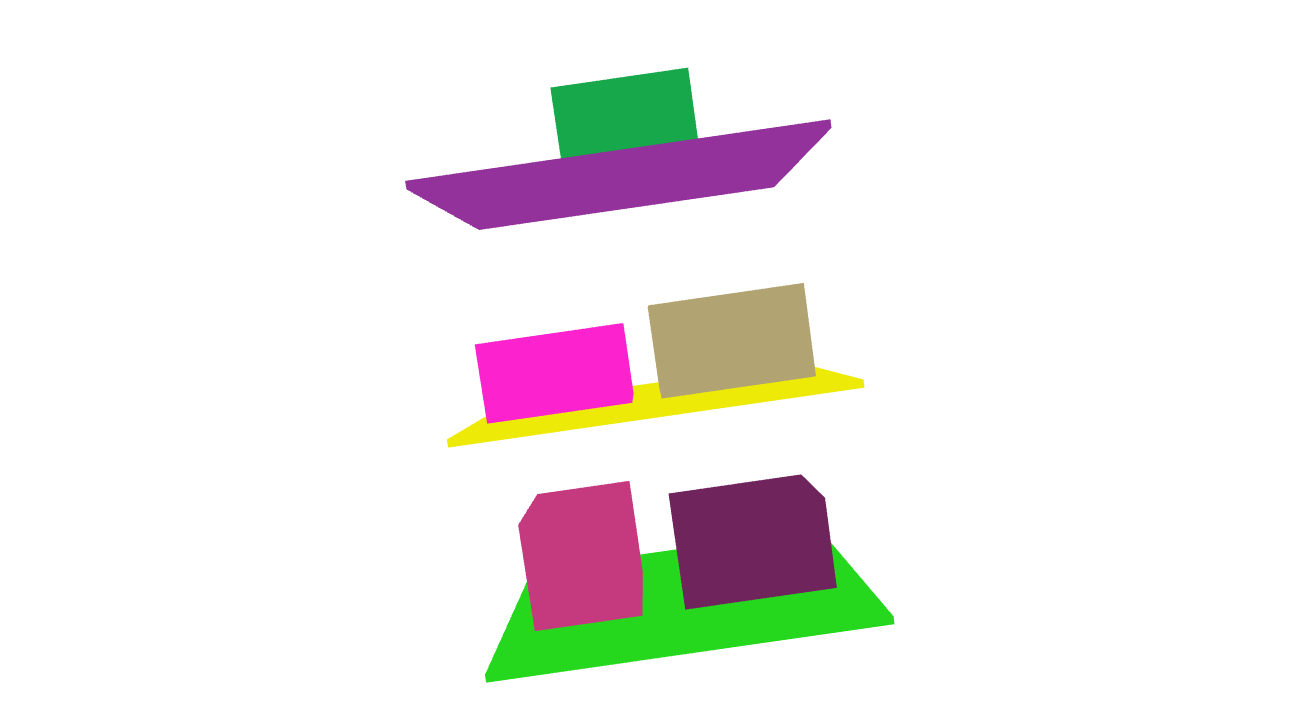

In [5]:
_, _, _, _, geometries_0 = wrapper_func(0)
_, _, _, _, geometries_1 = wrapper_func(1)


mesh_0 = geometries_0[0]
for geom in geometries_0[1:]:
    mesh_0 = mesh_0 + geom
    
mesh_1 = geometries_1[0]
for geom in geometries_1[1:]:
    mesh_1 = mesh_1 + geom

mesh_1 = mesh_1.translate((0, -3.7, 0))

# o3d.visualization.draw_geometries([mesh_0, mesh_1])

mesh_final = geometries_0[0] + geometries_0[1] + geometries_0[4] + mesh_1
o3d.visualization.draw_geometries([mesh_final])
# coordinate = o3d.geometry.TriangleMesh.create_coordinate_frame(size=1, origin=[0,0,0])
# o3d.visualization.draw_geometries([mesh_0, mesh_1, coordinate])

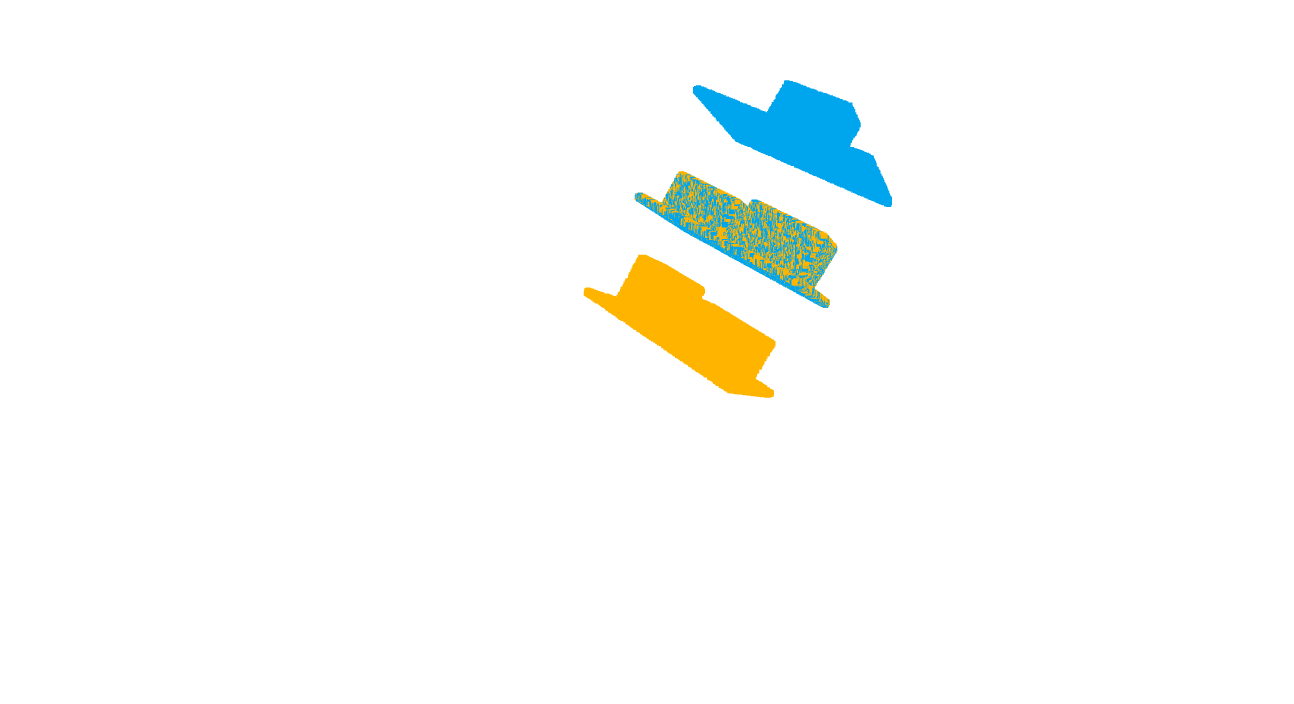

In [9]:
source = mesh_0.sample_points_uniformly(number_of_points=50000)
target = mesh_1.sample_points_uniformly(number_of_points=50000)
threshold = 10
trans_init = np.asarray([[1, 0, 0, 0.],
                         [0, 1, 0, 0],
                         [0, 0., 1, 0], [0.0, 0.0, 0.0, 1.0]])
draw_registration_result(source, target, trans_init)
# o3d.visualization.draw_geometries([source, target])

In [7]:
print("Initial alignment")
evaluation = o3d.pipelines.registration.evaluate_registration(
    source, target, threshold, trans_init)
print(evaluation)

Initial alignment
RegistrationResult with fitness=1.000000e+00, inlier_rmse=3.092391e+00, and correspondence_set size of 50000
Access transformation to get result.


Apply point-to-point ICP
RegistrationResult with fitness=1.000000e+00, inlier_rmse=2.490438e-01, and correspondence_set size of 50000
Access transformation to get result.
Transformation is:
[[ 0.99855932  0.04298913 -0.03211248 -0.0780724 ]
 [-0.04322668  0.99904256 -0.00673973 -3.64989029]
 [ 0.031792    0.00811814  0.99946154 -0.08121578]
 [ 0.          0.          0.          1.        ]]


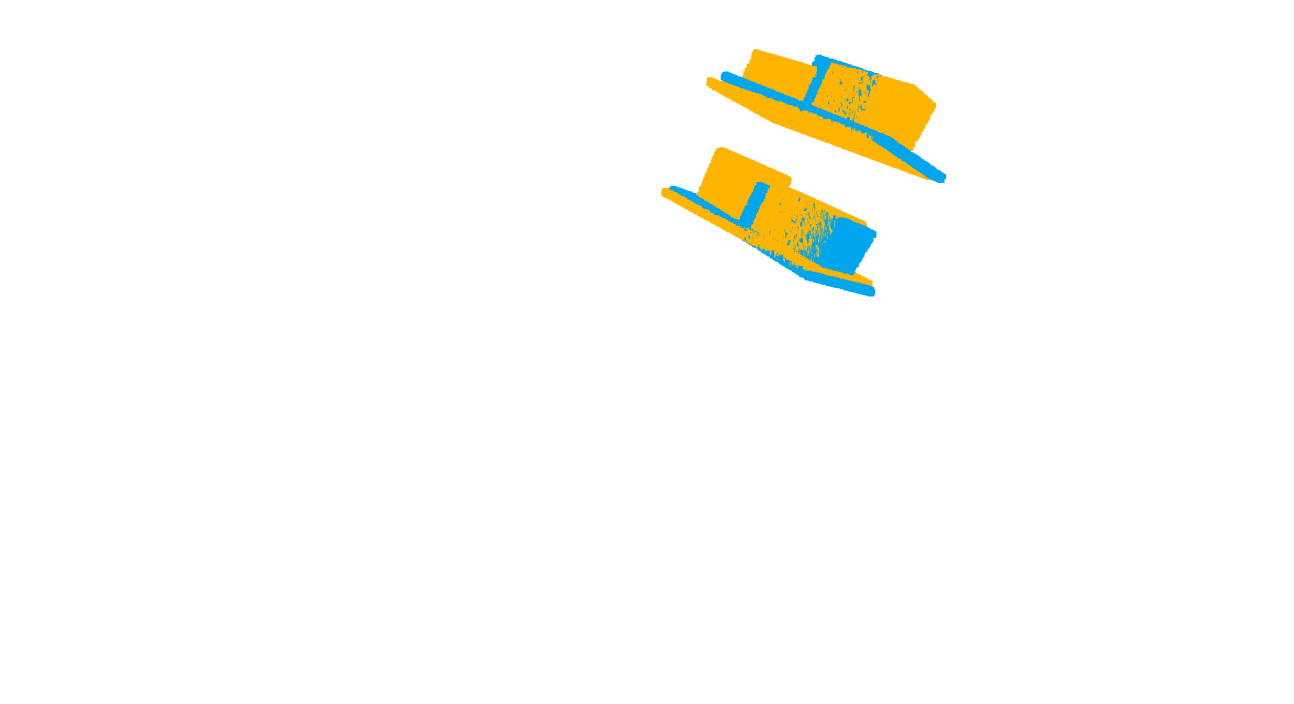

In [8]:
print("Apply point-to-point ICP")
reg_p2p = o3d.pipelines.registration.registration_icp(
    source, target, threshold, trans_init,
    o3d.pipelines.registration.TransformationEstimationPointToPoint(),
    o3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=20000))
print(reg_p2p)
print("Transformation is:")
print(reg_p2p.transformation)
draw_registration_result(source, target, reg_p2p.transformation)

# SDF code begins from here

In [13]:

mesh_final_temp = o3d.t.geometry.TriangleMesh.from_legacy(mesh_final)


# Create a scene and add the triangle mesh
scene = o3d.t.geometry.RaycastingScene()
_ = scene.add_triangles(mesh_final_temp)  # we do not need the geometry ID for mesh

vertices = list(mesh_final_temp.vertex.items())[1][1]
min_bound = vertices.min(0).numpy()
max_bound = vertices.max(0).numpy()

min_bound[0]-= 1; max_bound[0]+= 1 #sideways
min_bound[1]-= 3; max_bound[1]+= 3 #upwards and downwards
min_bound[2]-= 3; max_bound[2]+= 3 #depth

print(min_bound,max_bound)
sampling = 64
num_points = 50000
interval = sampling//4

[ -4.203125  -10.020312    1.4921875] [ 4.1640625  5.196045  11.4765625]


# Bottom

(50000, 3)
(64, 3)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


-1.6909059 7.904718
0
(64, 64, 3)
16
(64, 64, 3)
32
(64, 64, 3)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


48
(64, 64, 3)


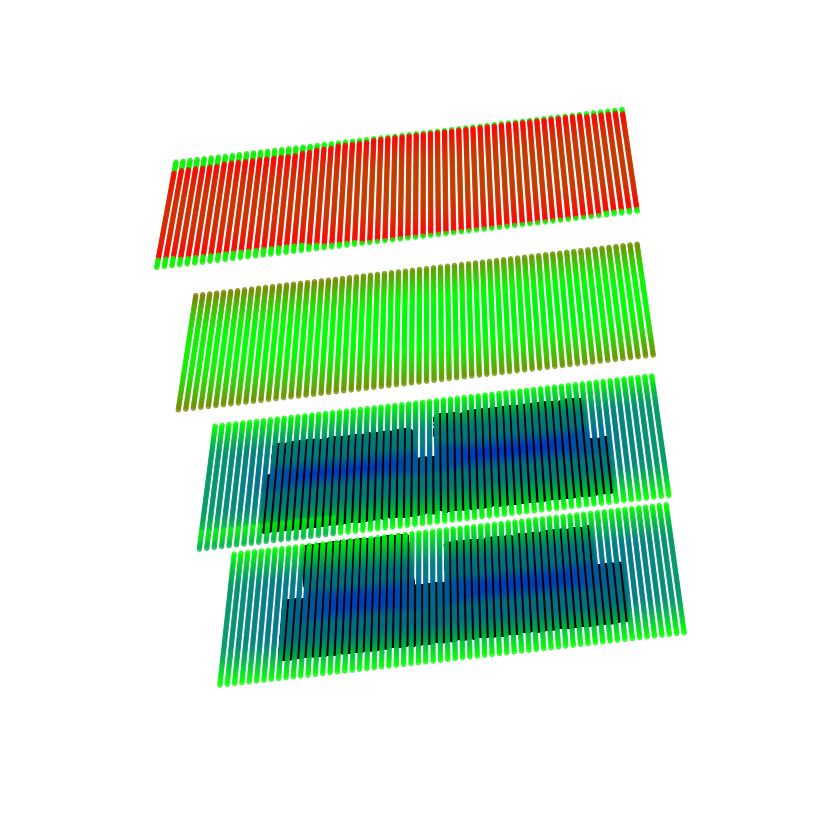

In [14]:

pcd_scene = mesh_0.sample_points_uniformly(number_of_points=num_points)
points_scene = np.asarray(pcd_scene.points)
print(points_scene.shape)

mesh_0 = o3d.t.geometry.TriangleMesh.from_legacy(mesh_0)


# Create a scene and add the triangle mesh
scene = o3d.t.geometry.RaycastingScene()
_ = scene.add_triangles(mesh_0)  # we do not need the geometry ID for mesh


N = 512
query_points = np.random.uniform(low=min_bound, high=max_bound,
                                 size=[N, 3]).astype(np.float32)

# Compute the signed distance for N random points
signed_distance = scene.compute_signed_distance(query_points)


xyz_range = np.linspace(min_bound, max_bound, num=sampling)
print(xyz_range.shape)

# query_points is a [32,32,32,3] array ..
query_points = np.stack(np.meshgrid(*xyz_range.T), axis=-1).astype(np.float32)

signed_distance_temp = scene.compute_signed_distance(query_points)
signed_distance_temp = signed_distance.numpy()

min_dist = np.min(signed_distance_temp)
max_dist = np.max(signed_distance_temp)

print(min_dist,max_dist)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

for i in range(0,sampling,interval):
# i = 17
    print(i)
    query_points_slice = query_points[i,:,:,:]
    print(query_points_slice.shape)

    # signed distance is a [32,32,32] array
    signed_distance = scene.compute_signed_distance(query_points_slice)
    signed_distance_numpy = signed_distance.numpy()

    query_points_slice = query_points_slice.reshape(sampling*sampling,3)
    signed_distance_numpy = signed_distance_numpy.reshape(sampling*sampling,1)
    colors = np.zeros_like(query_points_slice).astype(np.uint8)
    for ii in range(sampling*sampling):
        colors[ii] = rgb(min_dist, max_dist, signed_distance_numpy[ii][0])



    ax.scatter(query_points_slice[:,0],query_points_slice[:,1],query_points_slice[:,2], zorder=0, c = colors/255,alpha=0.7) 
    ax.scatter(points_scene[:,0],points_scene[:,1],points_scene[:,2],zorder=1, c = np.array([0,0,0])/255, alpha = 1)

    ax.view_init(elev=-70, azim=-83)
    plt.grid(False)
    plt.axis('off')
#     ax.set_ylim([min_bound[0],max_bound[0]])
#     ax.set_xlim([min_bound[1],max_bound[1]])
#     ax.set_zlim([min_bound[2],max_bound[2]])

plt.savefig("./data/%s.png"%(str(0)), bbox_inches="tight")
plt.show()



# Top

In [ ]:

pcd_scene = mesh_final.sample_points_uniformly(number_of_points=num_points)
points_scene = np.asarray(pcd_scene.points)
print(points_scene.shape)

mesh_final_temp = o3d.t.geometry.TriangleMesh.from_legacy(mesh_final)


# Create a scene and add the triangle mesh
scene = o3d.t.geometry.RaycastingScene()
_ = scene.add_triangles(mesh_final_temp)  # we do not need the geometry ID for mesh


N = 512
query_points = np.random.uniform(low=min_bound, high=max_bound,
                                 size=[N, 3]).astype(np.float32)

# Compute the signed distance for N random points
signed_distance = scene.compute_signed_distance(query_points)


xyz_range = np.linspace(min_bound, max_bound, num=sampling)
print(xyz_range.shape)

# query_points is a [32,32,32,3] array ..
query_points = np.stack(np.meshgrid(*xyz_range.T), axis=-1).astype(np.float32)

signed_distance_temp = scene.compute_signed_distance(query_points)
signed_distance_temp = signed_distance.numpy()
# min_dist = np.min(signed_distance_temp)
# max_dist = np.max(signed_distance_temp)
print(min_dist,max_dist)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
    
for i in range(0,sampling,interval):
# i = 17
    print(i)
    query_points_slice = query_points[i,:,:,:]
    print(query_points_slice.shape)

    # signed distance is a [32,32,32] array
    signed_distance = scene.compute_signed_distance(query_points_slice)
    signed_distance_numpy = signed_distance.numpy()

    query_points_slice = query_points_slice.reshape(sampling*sampling,3)
    signed_distance_numpy = signed_distance_numpy.reshape(sampling*sampling,1)
    colors = np.zeros_like(query_points_slice).astype(np.uint8)
    for ii in range(sampling*sampling):
        colors[ii] = rgb(min_dist, max_dist, signed_distance_numpy[ii][0])


    
    ax.scatter(query_points_slice[:,0],query_points_slice[:,1],query_points_slice[:,2],c = colors/255,alpha=1) # plot the point (2,3,4) on the figure

    ax.view_init(elev=-70, azim=-83)
    plt.grid(False)
    plt.axis('off')
#     ax.set_ylim([min_bound[0],max_bound[0]])
#     ax.set_xlim([min_bound[1],max_bound[1]])
#     ax.set_zlim([min_bound[2],max_bound[2]])
ax.scatter(points_scene[:,0],points_scene[:,1],points_scene[:,2],zorder=1, c = np.array([0,0,0])/255, alpha = 0.3)
plt.savefig("./data/%s.png"%(str(1)), bbox_inches="tight")
plt.show()



# Depth

In [ ]:
min_bound[2]-= 12; max_bound[2]+= 6 #depth
pcd_scene = mesh_final.sample_points_uniformly(number_of_points=num_points)
points_scene = np.asarray(pcd_scene.points)
print(points_scene.shape)

mesh_final = o3d.t.geometry.TriangleMesh.from_legacy(mesh_final)


# Create a scene and add the triangle mesh
scene = o3d.t.geometry.RaycastingScene()
_ = scene.add_triangles(mesh_final)  # we do not need the geometry ID for mesh


N = 512
query_points = np.random.uniform(low=min_bound, high=max_bound,
                                 size=[N, 3]).astype(np.float32)

# Compute the signed distance for N random points
signed_distance = scene.compute_signed_distance(query_points)


xyz_range = np.linspace(min_bound, max_bound, num=sampling)
print(xyz_range.shape)

# query_points is a [32,32,32,3] array ..
query_points = np.stack(np.meshgrid(*xyz_range.T), axis=-1).astype(np.float32)

signed_distance_temp = scene.compute_signed_distance(query_points)
signed_distance_temp = signed_distance.numpy()
min_dist = np.min(signed_distance_temp)
max_dist = np.max(signed_distance_temp)
print(min_dist,max_dist)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
    
for i in range(0,sampling,interval):
# i = 17
    print(i)
    query_points_slice = query_points[i,:,:,:]
    print(query_points_slice.shape)

    # signed distance is a [32,32,32] array
    signed_distance = scene.compute_signed_distance(query_points_slice)
    signed_distance_numpy = signed_distance.numpy()

    query_points_slice = query_points_slice.reshape(sampling*sampling,3)
    signed_distance_numpy = signed_distance_numpy.reshape(sampling*sampling,1)
    colors = np.zeros_like(query_points_slice).astype(np.uint8)
    for ii in range(sampling*sampling):
        colors[ii] = rgb(min_dist, max_dist, signed_distance_numpy[ii][0])


    ax.scatter(points_scene[:,0],points_scene[:,1],points_scene[:,2],zorder=1, c = np.array([0,0,0])/255, alpha = 0.3)
    ax.scatter(query_points_slice[:,0],query_points_slice[:,1],query_points_slice[:,2],c = colors/255,alpha=1) # plot the point (2,3,4) on the figure

    ax.view_init(elev=-70, azim=-83)
    plt.grid(False)
    plt.axis('off')
#     ax.set_ylim([min_bound[0],max_bound[0]])
#     ax.set_xlim([min_bound[1],max_bound[1]])
#     ax.set_zlim([min_bound[2],max_bound[2]])
plt.savefig("./data/%s.png"%(str(2)), bbox_inches="tight")
plt.show()

